In [6]:
library(ggplot2)
library(ggthemes)
library(viridisLite)
library(viridis)

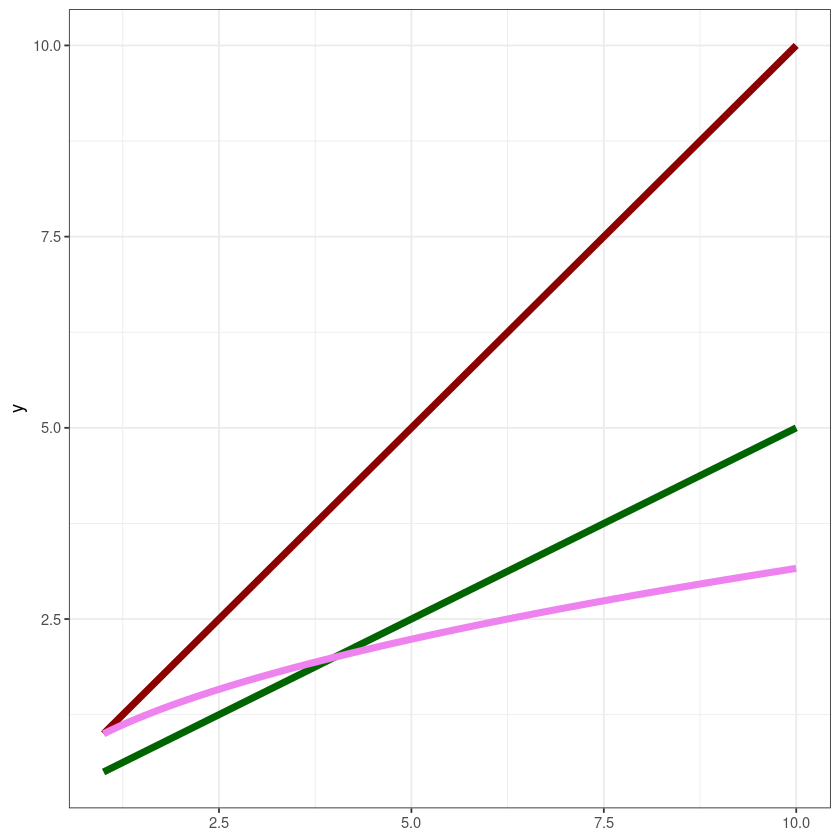

In [26]:
ada <- function(n){n}
das <- function(n){1/2*n}
eme <- function(n){n^(1/2)}
scater <- ggplot( ) + xlim(1,10)
scater + geom_function(fun = ada, colour = "darkred", lwd = 2)+
geom_function(fun = das, colour = "darkgreen", lwd = 2)+
geom_function(fun = eme, colour = "violet", lwd = 2)+
theme_bw()

In [5]:
vcf <- read.table("matrix.csv", header = TRUE)
vcfmatrix <- as.matrix(vcf)

In [53]:
dim(vcfmatrix)

[1] 4483   77

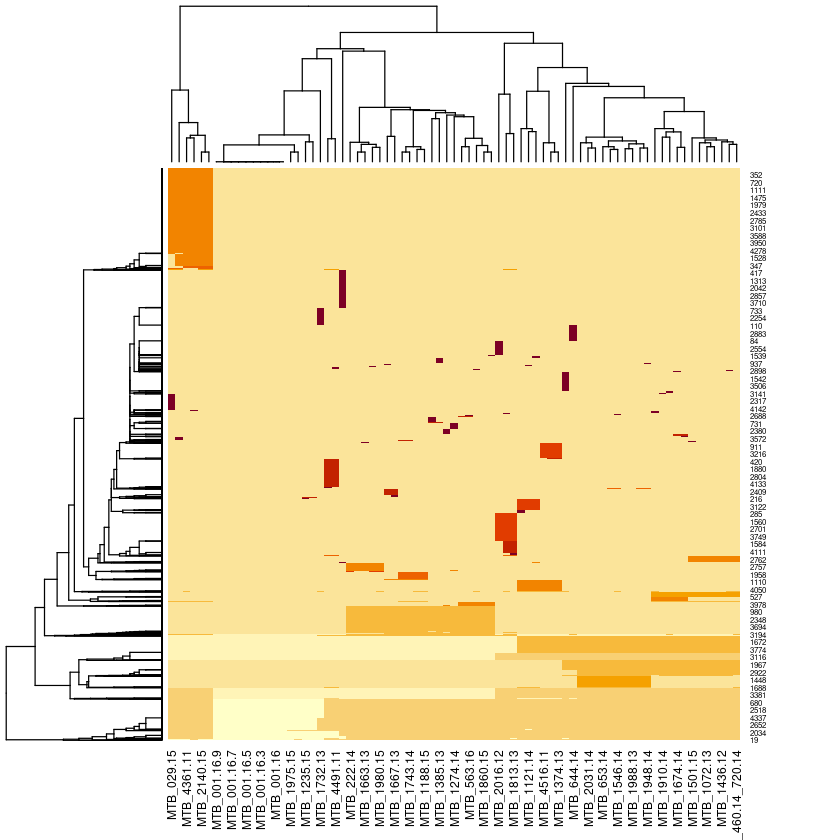

In [35]:
heatmap(vcfmatrix)

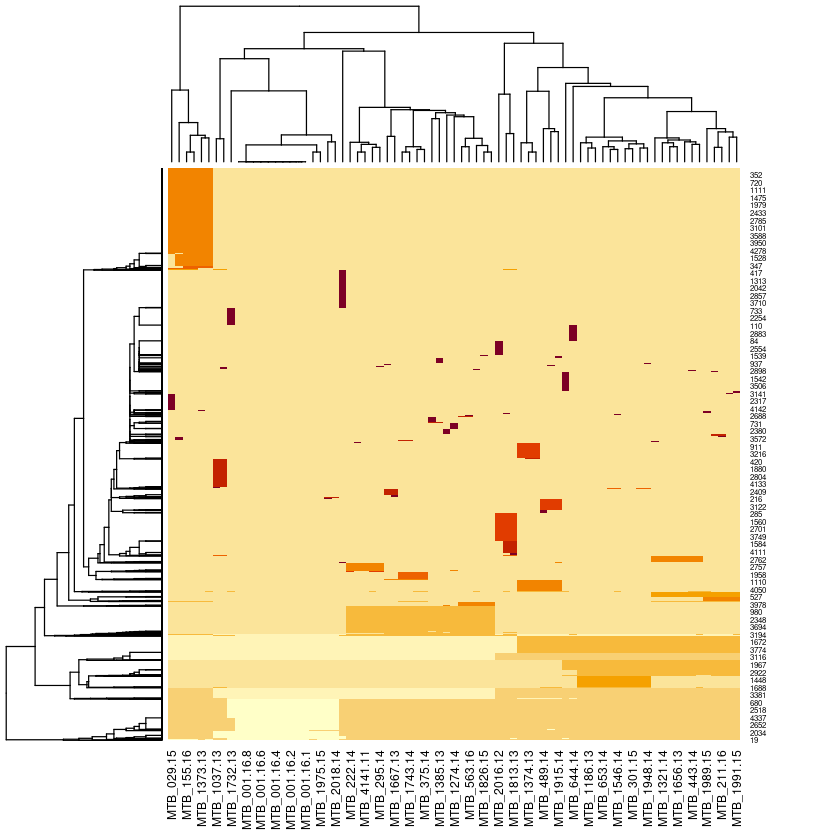

In [39]:
heatmap(vcfmatrix, Colv = FALSE)

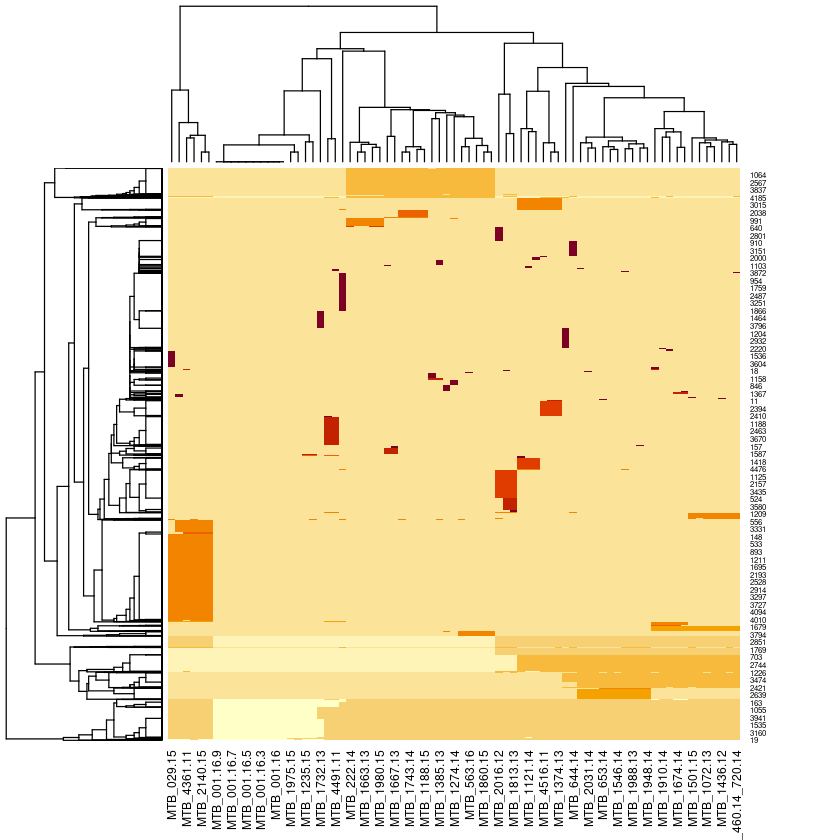

In [38]:
heatmap(vcfmatrix, Rowv = FALSE)

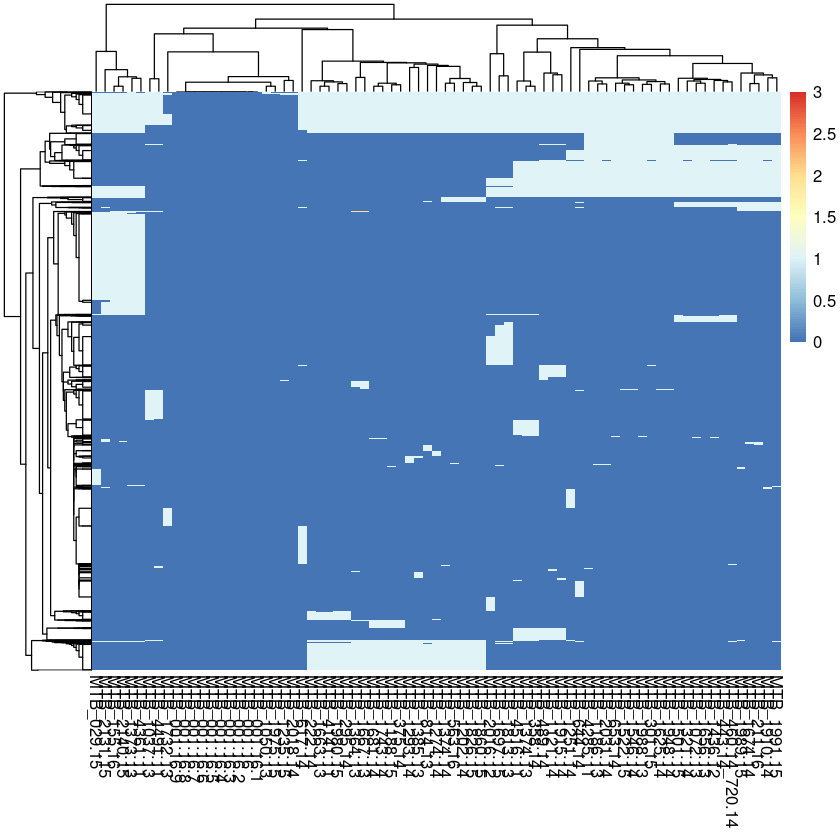

In [7]:
pheatmap(vcfmatrix)

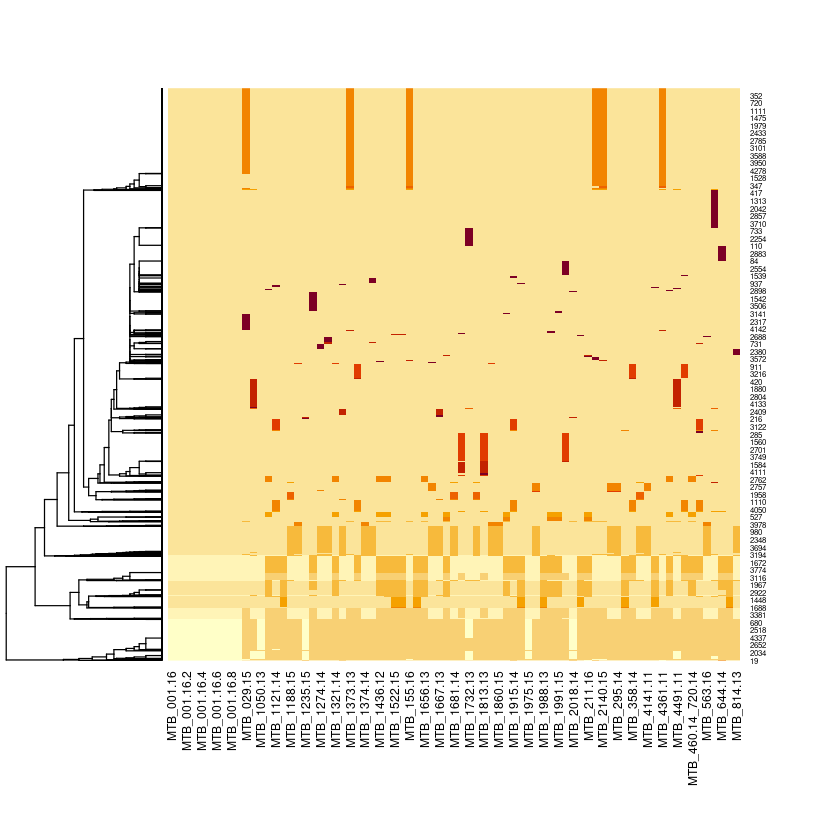

In [49]:
heatmap(vcfmatrix, Colv = NA)

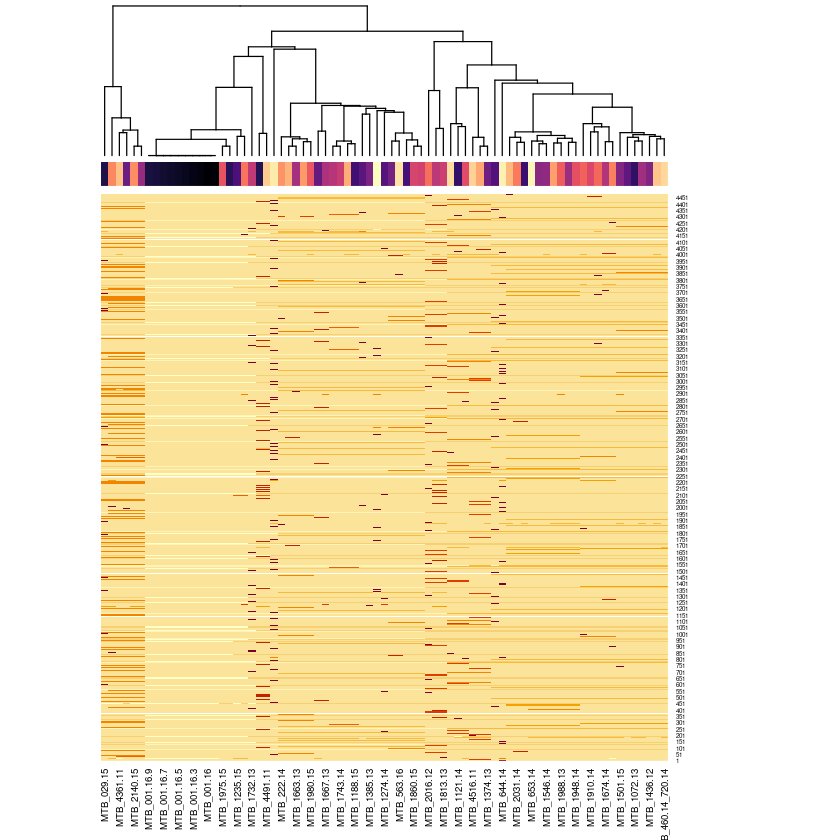

In [65]:
heatmap(vcfmatrix, Rowv = NA, ColSideColors = magma(77))

In [1]:
library(pheatmap)

In [12]:
library(vcfR)
library(adegenet)

Loading required package: ade4


   /// adegenet 2.1.4 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()





In [8]:
vf <- read.vcfR("aln_xdr.vcf")

Scanning file to determine attributes.
File attributes:
  meta lines: 3
  header_line: 4
  variant count: 4483
  column count: 77
Meta line 3 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 4483
  Character matrix gt cols: 77
  skip: 0
  nrows: 4483
  row_num: 0
Processed variant: 4483
All variants processed


In [13]:
x <- vcfR2genlight(vf)

Warning message in vcfR2genlight(vf):
“Found 12 loci with more than two alleles.
Objects of class genlight only support loci with two alleles.
12 loci will be omitted from the genlight object.”


In [14]:
ploidy(x) <- 1

In [15]:
x.dist <- dist(x)

In [16]:
library(poppr)

Registered S3 method overwritten by 'pegas':
  method      from
  print.amova ade4

This is poppr version 2.9.2. To get started, type package?poppr
OMP parallel support: available



In [19]:
x.dist <- poppr::bitwise.dist(x)
x.dist

                    MTB_001-16   MTB_029-15  MTB_1037-13  MTB_1050-13
MTB_029-15        0.2737642586                                       
MTB_1037-13       0.1147394319 0.2735405949                          
MTB_1050-13       0.0029076269 0.2744352494 0.1122791322             
MTB_1072-13       0.1818385149 0.2789085216 0.1793782152 0.1789308879
MTB_1121-14       0.1787072243 0.2771192127 0.1771415791 0.1757995974
MTB_1186-13       0.1820621785 0.2786848580 0.1787072243 0.1791545516
MTB_1188-15       0.1388951018 0.2699619772 0.1341981660 0.1364348021
MTB_1202-14       0.1326325207 0.2641467233 0.1279355849 0.1297248938
MTB_1235-15       0.0051442630 0.2748825766 0.1140684411 0.0058152539
MTB_1251-14       0.1863117871 0.2838291210 0.1829568329 0.1834041601
MTB_1274-14       0.1344218296 0.2659360322 0.1297248938 0.1315142026
MTB_1293-14       0.1348691568 0.2663833594 0.1301722210 0.1319615299
MTB_1321-14       0.1813911877 0.2784611944 0.1793782152 0.1784835607
MTB_1364-13       0.

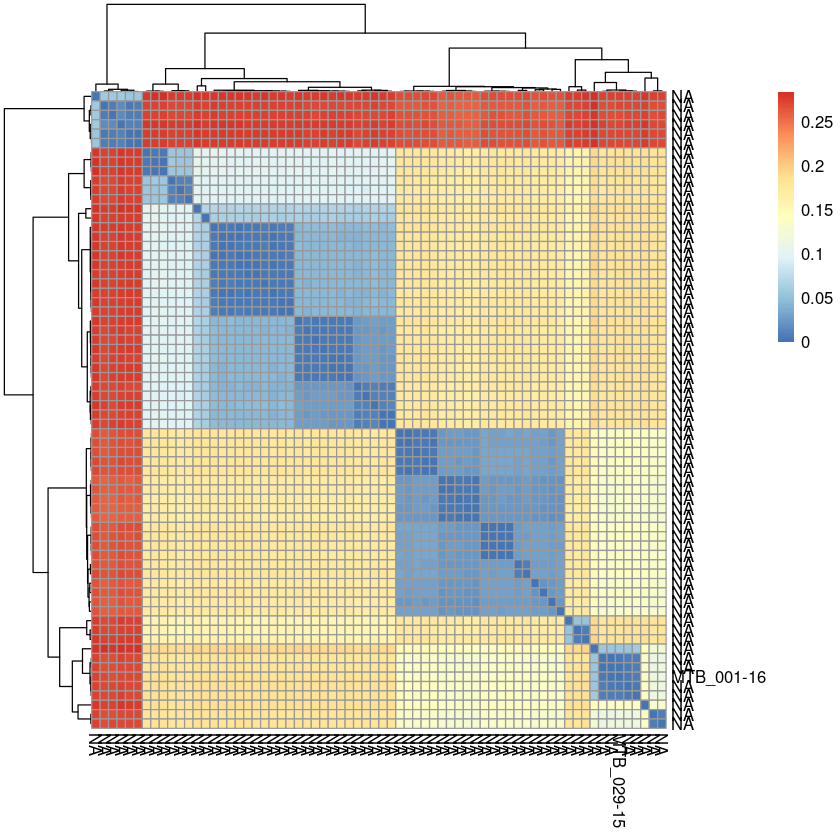

In [20]:
pheatmap(x.dist)

In [18]:
vfc <- read.vcfR("aln_xdr.vcf")

Scanning file to determine attributes.
File attributes:
  meta lines: 3
  header_line: 4
  variant count: 4483
  column count: 77
Meta line 3 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 4483
  Character matrix gt cols: 77
  skip: 0
  nrows: 4483
  row_num: 0
Processed variant: 4483
All variants processed


Select the number of axes: 

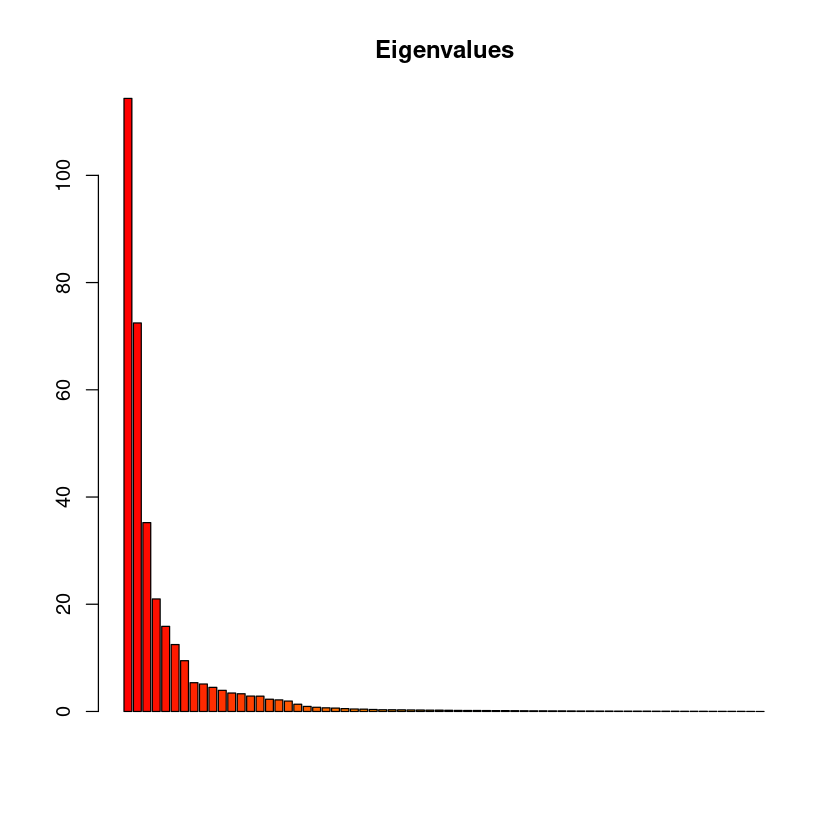

In [24]:
pca <- glPca(x)

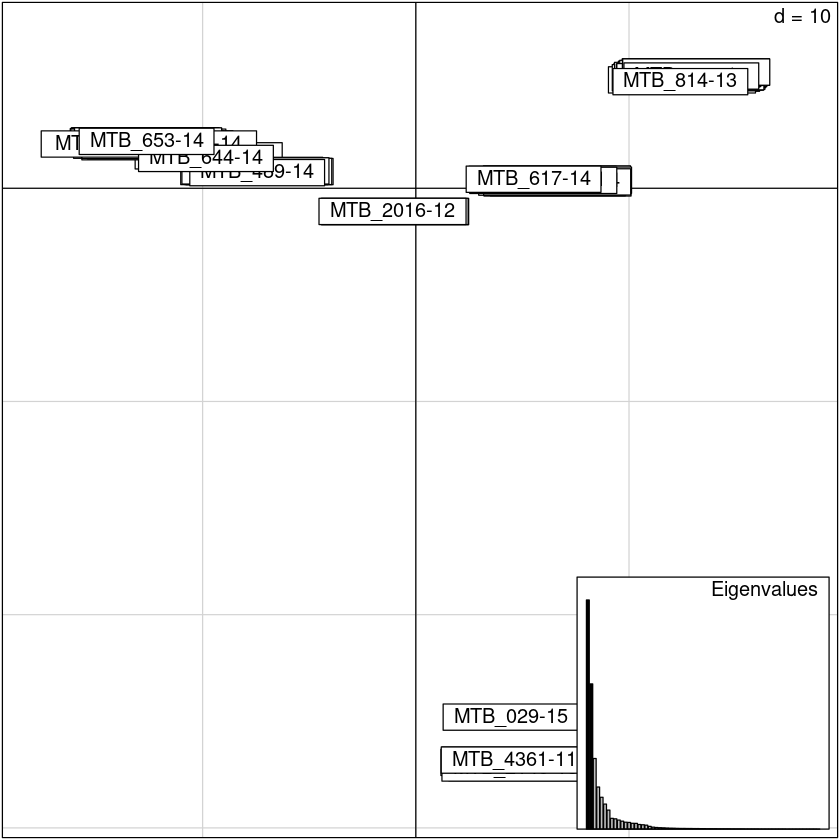

In [25]:
scatter(pca, posi="bottomright")

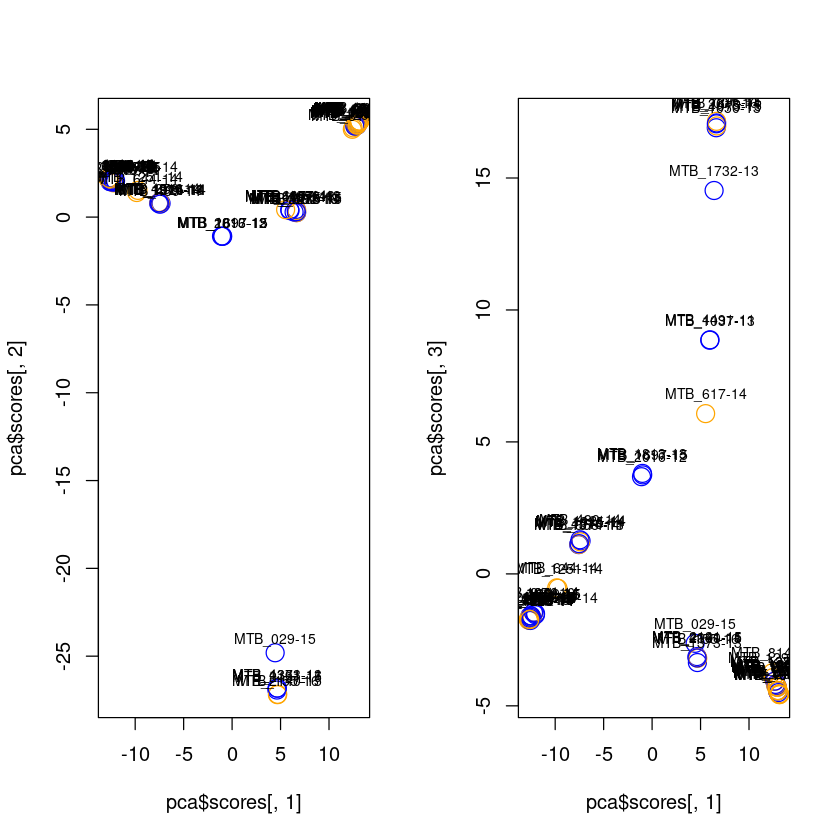

In [26]:
par(mfrow=c(1,2))
plot(pca$scores[,1], pca$scores[,2],
     col=c(rep("blue",7), rep("orange",7)),cex=2)
text(pca$scores[,1], pca$scores[,2] + 0.7,
     labels=rownames(pca$scores), cex= 0.7)
plot(pca$scores[,1], pca$scores[,3],
     col=c(rep("blue",7), rep("orange",7)),cex=2)
text(pca$scores[,1], pca$scores[,3] + 0.7,
    labels=rownames(pca$scores), cex= 0.7)

[fuente de los ultimos scripts](https://wurmlab.com/genomicscourse/2016-SIB/practicals/population_genetics/popgen)